In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:

client_data = pd.read_csv('/Users/manhaawan/Documents/Energy Consumption Project/client.csv')
gas_prices = pd.read_csv('/Users/manhaawan/Documents/Energy Consumption Project/gas_prices.csv')
historical_weather = pd.read_csv('/Users/manhaawan/Documents/Energy Consumption Project/historical_weather.csv')
train = pd.read_csv('/Users/manhaawan/Documents/Energy Consumption Project/train.csv')
display(historical_weather)


,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710797,2023-05-30 10:00:00,11.7,4.6,0.0,0.0,1018.9,40,9,54,0,1.055556,253,567.0,392.0,175.0,59.7,26.2,637.0
1710798,2023-05-30 10:00:00,12.3,3.5,0.0,0.0,1019.0,46,4,70,0,0.805556,263,581.0,407.0,174.0,59.7,26.7,637.0
1710799,2023-05-30 10:00:00,9.8,3.0,0.0,0.0,1019.2,41,4,62,0,1.972222,285,609.0,432.0,177.0,59.7,27.2,637.0
1710800,2023-05-30 10:00:00,11.7,1.6,0.0,0.0,1019.0,44,0,73,0,3.500000,307,658.0,521.0,137.0,59.7,27.7,637.0


In [3]:
train["datetime"] = pd.to_datetime(train["datetime"], errors='coerce')
historical_weather["datetime"] = pd.to_datetime(historical_weather["datetime"], errors='coerce')

train["date"] = train["datetime"].dt.date
historical_weather["date"] = historical_weather["datetime"].dt.date



In [4]:
#Drop duplicates
client_data = client_data.drop_duplicates(subset='data_block_id')
historical_weather = historical_weather.drop_duplicates(subset='data_block_id')
gas_prices = gas_prices.drop_duplicates(subset='data_block_id')

#List dataframes to merge
merge_dfs = [client_data, historical_weather, gas_prices]

#New dataframe
merged_df = train.copy()

#Merge in a loop with suffixes and column overlap check
for df in merge_dfs:
    overlapping_cols = set(merged_df.columns).intersection(set(df.columns)) - {'data_block_id'}
    if overlapping_cols:
        print(f"Warning: Overlapping columns found: {overlapping_cols}")
    merged_df = merged_df.merge(df, on='data_block_id', how='left', suffixes=('', '_dup'))

#Drop duplicate columns
merged_df = merged_df.loc[:, ~merged_df.columns.str.endswith('_dup')]

display(merged_df)


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,date,...,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0,2021-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0,2021-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1,2021-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1,2021-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2,2021-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64,2023-05-31,...,4.0,618.0,489.0,129.0,57.6,21.7,2023-05-30,29.0,34.0,2023-05-29
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59,2023-05-31,...,4.0,618.0,489.0,129.0,57.6,21.7,2023-05-30,29.0,34.0,2023-05-29
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59,2023-05-31,...,4.0,618.0,489.0,129.0,57.6,21.7,2023-05-30,29.0,34.0,2023-05-29
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60,2023-05-31,...,4.0,618.0,489.0,129.0,57.6,21.7,2023-05-30,29.0,34.0,2023-05-29


In [5]:
merged_df["hour"] = merged_df["datetime"].dt.hour
merged_df["dayofweek"] = merged_df["datetime"].dt.dayofweek
merged_df["month"] = merged_df["datetime"].dt.month


In [6]:
merged_df = merged_df.sort_values(by=["prediction_unit_id", "datetime"])
merged_df["target_lag_24h"] = merged_df.groupby("prediction_unit_id")["target"].shift(24)


In [7]:
# Ensure 'date' column exists in both DataFrames
historical_weather["date"] = pd.to_datetime(historical_weather["datetime"]).dt.date
merged_df["date"] = pd.to_datetime(merged_df["datetime"]).dt.date

# Aggregate historical weather by date
weather_daily = historical_weather.groupby("date").agg({
    "temperature": "mean",
    "shortwave_radiation": "mean",
    "cloudcover_total": "mean",
    "windspeed_10m": "mean",
    "dewpoint": "mean",
    "rain": "mean",
    "surface_pressure": "mean",
    "snowfall": "mean",
    "cloudcover_total": "mean",
    "winddirection_10m": "mean",
    "direct_solar_radiation": "mean",
    "diffuse_radiation": "mean",

}).reset_index()
# Rename aggregated columns to avoid conflict
weather_daily = weather_daily.rename(columns={
    
    "temperature": "daily_avg_temp",
    "shortwave_radiation": "daily_avg_radiation",
    "cloudcover_total": "daily_avg_cloudcover",
    "windspeed_10m": "daily_avg_wind",
    "dewpoint": "daily_avg_dewpoint",
    "rain": "daily_avg_rain",
    "surface_pressure": "daily_avg_pressure",
    "snowfall": "daily_avg_snowfall",
    "winddirection_10m": "daily_avg_winddirection",
    "direct_solar_radiation": "daily_avg_direct_radiation",
    "diffuse_radiation": "daily_avg_diffuse_radiation"

})

# Merge safely
merged_df = merged_df.merge(weather_daily, on="date", how="left")

# Optional: preview the result
print(merged_df[["datetime", "daily_avg_temp", "daily_avg_radiation", "daily_avg_cloudcover", "daily_avg_wind"]].head())




             datetime  daily_avg_temp  daily_avg_radiation  \
0 2021-09-01 00:00:00            14.7                193.5   
1 2021-09-01 00:00:00            14.7                193.5   
2 2021-09-01 01:00:00            14.7                193.5   
3 2021-09-01 01:00:00            14.7                193.5   
4 2021-09-01 02:00:00            14.7                193.5   

   daily_avg_cloudcover  daily_avg_wind  
0                  60.5        7.763889  
1                  60.5        7.763889  
2                  60.5        7.763889  
3                  60.5        7.763889  
4                  60.5        7.763889  


In [8]:
merged_df["product_type"] = merged_df["product_type"].astype("category").cat.codes
merged_df["county"] = merged_df["county"].astype("category").cat.codes


In [9]:
merged_df["target_rolling_24h"] = merged_df.groupby("prediction_unit_id")["target"].rolling(24).mean().reset_index(0, drop=True)


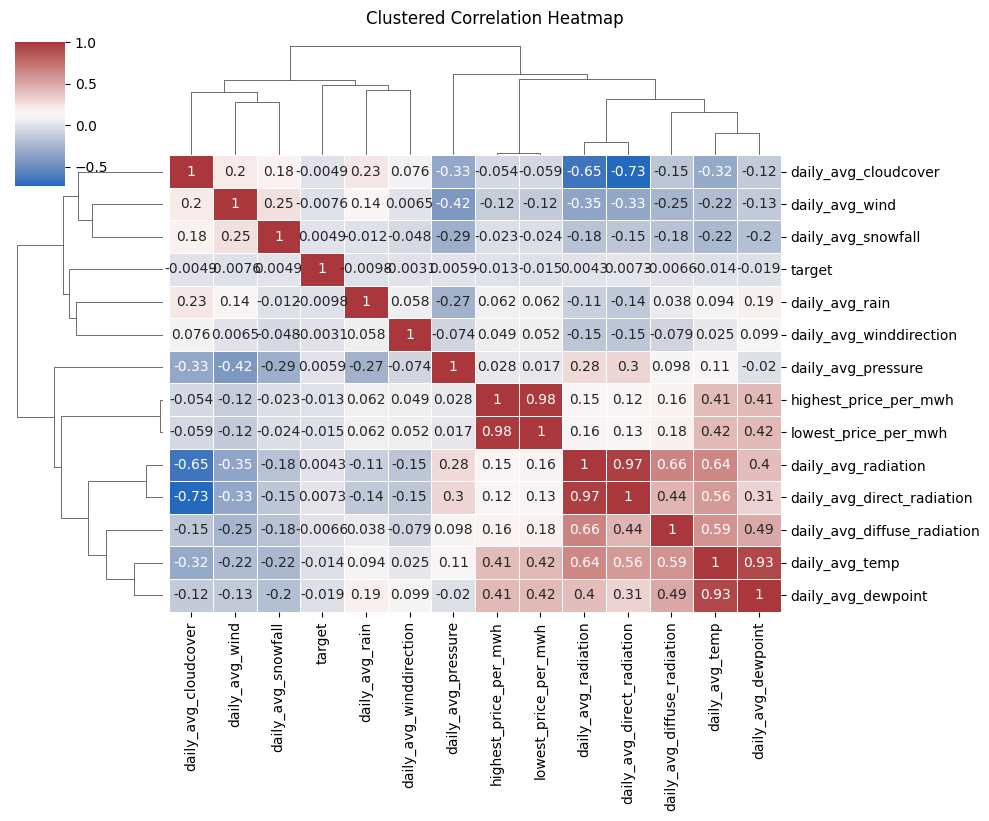

In [10]:
import seaborn as sns

corr = merged_df[["target", "highest_price_per_mwh", "lowest_price_per_mwh",  "daily_avg_temp", "daily_avg_radiation", "daily_avg_cloudcover", "daily_avg_wind", "daily_avg_dewpoint","daily_avg_rain", "daily_avg_pressure","daily_avg_snowfall", "daily_avg_winddirection",  "daily_avg_direct_radiation", "daily_avg_diffuse_radiation"
]].corr()

sns.clustermap(corr, annot=True, cmap="vlag", linewidths=0.5, figsize=(10, 8))
plt.suptitle("Clustered Correlation Heatmap", y=1.02)
plt.show()




In [11]:
import pandas as pd

# List of features including the target
features = [
    "target", "highest_price_per_mwh", "lowest_price_per_mwh", "daily_avg_temp",
    "daily_avg_radiation", "daily_avg_cloudcover", "daily_avg_wind", "daily_avg_dewpoint",
    "daily_avg_rain", "daily_avg_pressure", "daily_avg_snowfall", "daily_avg_winddirection",
    "daily_avg_direct_radiation", "daily_avg_diffuse_radiation"
]

# Compute correlation matrix
corr_matrix = merged_df[features].corr()

# Extract correlation with the target
target_corr = corr_matrix["target"].drop("target")

# Select features with absolute correlation above a threshold
threshold = 0.000001
selected_features = target_corr[abs(target_corr) > threshold].index.tolist()

# Print selected features
print("Selected features based on correlation with target:")
print(selected_features)


Selected features based on correlation with target:
['highest_price_per_mwh', 'lowest_price_per_mwh', 'daily_avg_temp', 'daily_avg_radiation', 'daily_avg_cloudcover', 'daily_avg_wind', 'daily_avg_dewpoint', 'daily_avg_rain', 'daily_avg_pressure', 'daily_avg_snowfall', 'daily_avg_winddirection', 'daily_avg_direct_radiation', 'daily_avg_diffuse_radiation']


/var/folders/y_/rl89k08x79xfpykmlpfcvhc80000gp/T/ipykernel_73582/3929109271.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr_sorted.values, y=target_corr_sorted.index, palette="coolwarm")


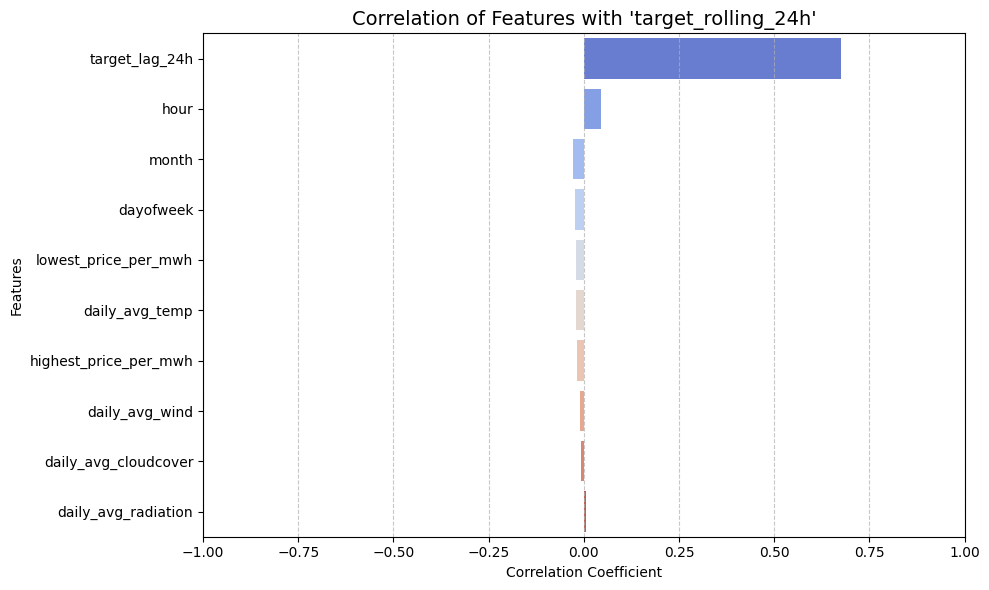

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = merged_df[[
    "hour", "dayofweek", "month", "daily_avg_temp", "daily_avg_radiation",
    "daily_avg_cloudcover", "daily_avg_wind", "target_lag_24h",
    "target_rolling_24h", "lowest_price_per_mwh", "highest_price_per_mwh"
]].corr()

# Define the target column
target_column = "target_rolling_24h"

# Drop the target itself and get correlations with the target
target_corr = corr[target_column].drop(target_column)

# Sort correlations by absolute value
target_corr_sorted = target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr_sorted.values, y=target_corr_sorted.index, palette="coolwarm")
plt.title(f"Correlation of Features with '{target_column}'", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.xlim(-1, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


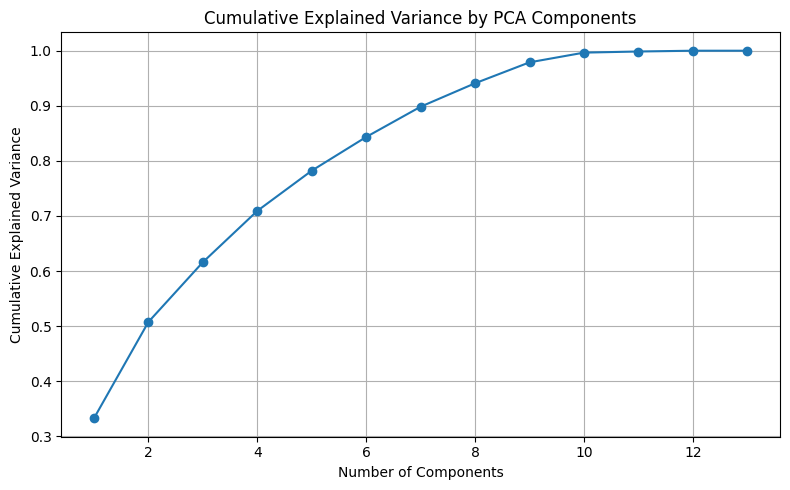

Selected 9 principal components that explain at least 95% of the variance.


In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the features with weak individual correlation
features = [
    'highest_price_per_mwh', 'lowest_price_per_mwh', 'daily_avg_temp',
    'daily_avg_radiation', 'daily_avg_cloudcover', 'daily_avg_wind',
    'daily_avg_dewpoint', 'daily_avg_rain', 'daily_avg_pressure',
    'daily_avg_snowfall', 'daily_avg_winddirection',
    'daily_avg_direct_radiation', 'daily_avg_diffuse_radiation'
]

# Extract feature matrix and target
X = merged_df[features].dropna()
y = merged_df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

# Select number of components that explain at least 95% of the variance
explained_variance = pca.explained_variance_ratio_.cumsum()
n_components = next(i for i, v in enumerate(explained_variance) if v >= 0.95) + 1

# Transform data using selected components
X_reduced = X_pca[:, :n_components]

print(f"Selected {n_components} principal components that explain at least 95% of the variance.")


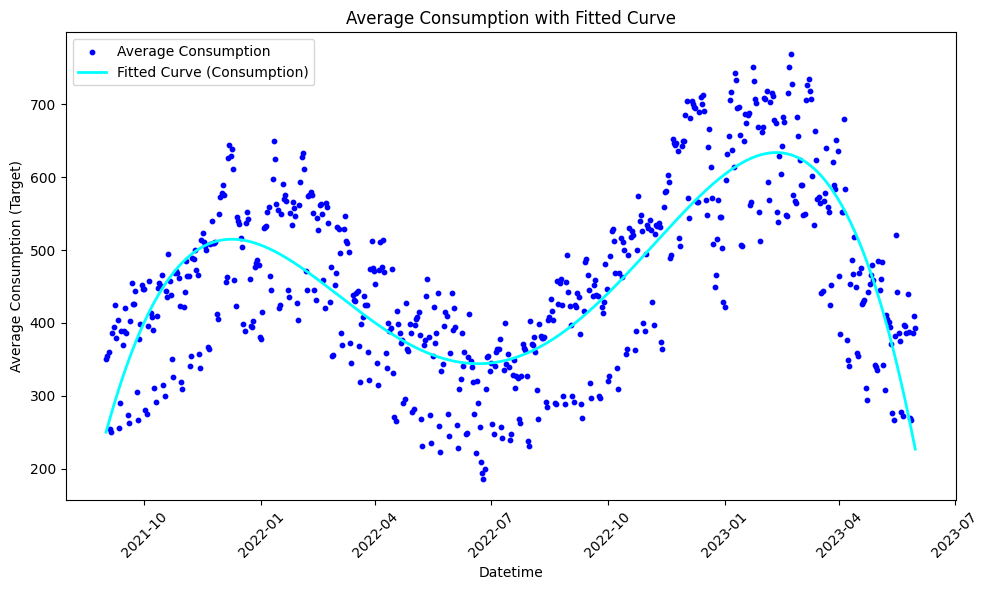

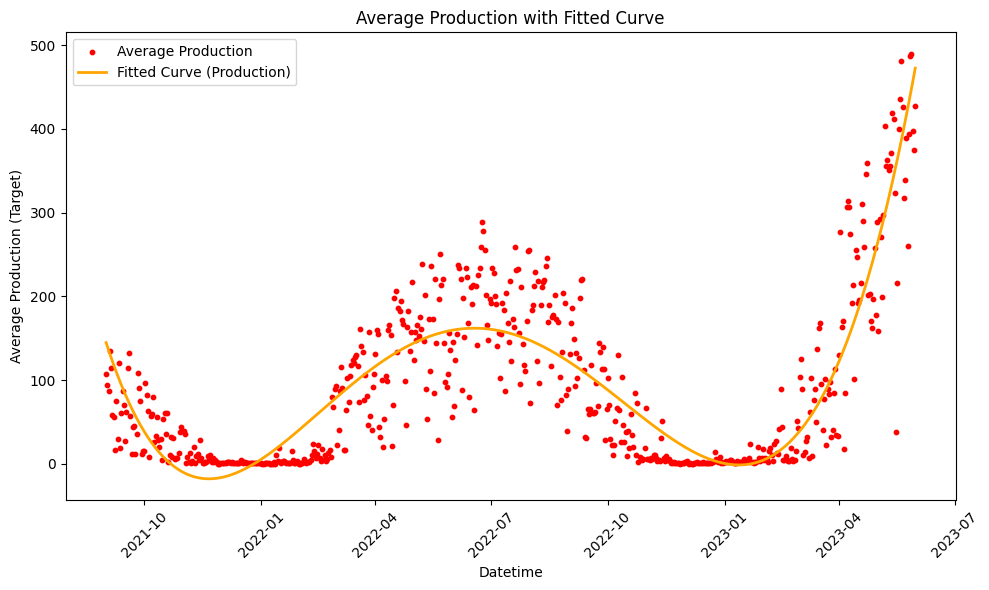

'for fold, (train_index, test_index) in enumerate(tscv.split(X)):\n    print(f"Fold {fold + 1}")\n    X_train, X_test = X_reduced[train_index], X_reduced[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n\n    # Now train  model here:\n    model = RandomForestRegressor(n_estimators=50)\n    model.fit(X_train, y_train)\n    preds = model.predict(X_test)\n\n    print(f"Train size: {len(train_index)}, Test size: {len(test_index)}")'

In [16]:

# Filter data for consumption and production
consumption_data = merged_df[merged_df["is_consumption"] == True]
production_data = merged_df[merged_df["is_consumption"] == False]

# Group by datetime and calculate the average for each day
consumption_data_avg = consumption_data.groupby(consumption_data["datetime"].dt.date)["target"].mean()
production_data_avg = production_data.groupby(production_data["datetime"].dt.date)["target"].mean()

# Convert datetime index to a more usable format (e.g., datetime objects)
consumption_data_avg.index = pd.to_datetime(consumption_data_avg.index)
production_data_avg.index = pd.to_datetime(production_data_avg.index)

# Fit polynomial curve for consumption
x_consumption = np.array(consumption_data_avg.index.astype(np.int64) / 10**9)  # Convert datetime to Unix timestamp
y_consumption = consumption_data_avg.values

# Fit a 2nd degree polynomial curve (you can change the degree if needed)
coeff_consumption = np.polyfit(x_consumption, y_consumption, deg=5)
poly_consumption = np.poly1d(coeff_consumption)

# Generate fitted values
y_consumption_fit = poly_consumption(x_consumption)

# Plot for consumption (scatter plot with fitted curve)
plt.figure(figsize=(10, 6))
plt.scatter(consumption_data_avg.index, y_consumption, label="Average Consumption", color='blue', s=10)
plt.plot(consumption_data_avg.index, y_consumption_fit, label="Fitted Curve (Consumption)", color='cyan', linewidth=2)
plt.title("Average Consumption with Fitted Curve")
plt.xlabel("Datetime")
plt.ylabel("Average Consumption (Target)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Fit polynomial curve for production
x_production = np.array(production_data_avg.index.astype(np.int64) / 10**9)  # Convert datetime to Unix timestamp
y_production = production_data_avg.values

# Fit a 2nd degree polynomial curve (you can change the degree if needed)
coeff_production = np.polyfit(x_production, y_production, deg=5)
poly_production = np.poly1d(coeff_production)

# Generate fitted values
y_production_fit = poly_production(x_production)

# Plot for production (scatter plot with fitted curve)
plt.figure(figsize=(10, 6))
plt.scatter(production_data_avg.index, y_production, label="Average Production", color='red', s=10)
plt.plot(production_data_avg.index, y_production_fit, label="Fitted Curve (Production)", color='orange', linewidth=2)
plt.title("Average Production with Fitted Curve")
plt.xlabel("Datetime")
plt.ylabel("Average Production (Target)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from sklearn.ensemble import RandomForestRegressor

features = ["hour", "dayofweek", "month",  "daily_avg_temp", "daily_avg_radiation", "daily_avg_cloudcover", "daily_avg_wind", "target_lag_24h", "target_rolling_24h", 
            "lowest_price_per_mwh", "highest_price_per_mwh"]

from sklearn.model_selection import TimeSeriesSplit

# Prepare data, drop rows with NaNs in features or target
data = merged_df.dropna(subset=features + ["target"])

X = data[features].values  # convert to numpy array
y = data["target"].values  # convert to numpy array

# Initialize TimeSeriesSplit
#tscv = TimeSeriesSplit(n_splits=3)  # change the number of splits

'''for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"Fold {fold + 1}")
    X_train, X_test = X_reduced[train_index], X_reduced[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Now train  model here:
    model = RandomForestRegressor(n_estimators=50)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    print(f"Train size: {len(train_index)}, Test size: {len(test_index)}")'''


In [17]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error

def rolling_window_split(X, y, train_size, test_size, max_folds=1000):
    """
    Yields train and test indices for rolling window cross-validation with a fold limit.

    Args:
        X (np.array): Features
        y (np.array): Target
        train_size (int): Number of samples in training window
        test_size (int): Number of samples in test window
        max_folds (int): Maximum number of folds to generate

    Yields:
        train_index (np.array), test_index (np.array)
    """
    n_samples = len(X)
    start = 0
    fold = 0

    while True:
        train_start = start
        train_end = train_start + train_size
        test_end = train_end + test_size

        if test_end > n_samples or fold >= max_folds:
            break

        train_index = np.arange(train_start, train_end)
        test_index = np.arange(train_end, test_end)

        yield train_index, test_index

        start += test_size  # slide window forward by test_size
        fold += 1


# Example: rolling window + XGBoost time series forecasting
train_size = 1502128
test_size = 500
max_folds = 50

def xgboost_forecast(X_train, y_train, X_test):
    """
    Forecast using XGBoost model.

    Args:
        X_train (np.array): Training features
        y_train (np.array): Training target values
        X_test (np.array): Test features

    Returns:
        np.array: Predicted values for X_test
    """
    # Instantiate and fit the XGBoost regressor
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    return y_pred

# Run folds with XGBoost
for fold, (train_idx, test_idx) in enumerate(rolling_window_split(X, y, train_size, test_size, max_folds=max_folds)):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    # Use XGBoost forecasting
    y_pred = xgboost_forecast(X_train, y_train, X_test)

    # Calculate performance (optional)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Fold {fold + 1}")
    print("Train indices:", train_idx)
    print("Test indices:", test_idx)
    print("Predicted sample:", y_pred[:5])  # Show a sample of predicted values
    print("Actual sample:   ", y_test[:5])  # Show a sample of actual values
    print(f"Mean Squared Error: {mse}")
    print("---")




    #split into train validation test

Fold 1
Train indices: [      0       1       2 ... 1502125 1502126 1502127]
Test indices: [1502128 1502129 1502130 1502131 1502132 1502133 1502134 1502135 1502136
 1502137 1502138 1502139 1502140 1502141 1502142 1502143 1502144 1502145
 1502146 1502147 1502148 1502149 1502150 1502151 1502152 1502153 1502154
 1502155 1502156 1502157 1502158 1502159 1502160 1502161 1502162 1502163
 1502164 1502165 1502166 1502167 1502168 1502169 1502170 1502171 1502172
 1502173 1502174 1502175 1502176 1502177 1502178 1502179 1502180 1502181
 1502182 1502183 1502184 1502185 1502186 1502187 1502188 1502189 1502190
 1502191 1502192 1502193 1502194 1502195 1502196 1502197 1502198 1502199
 1502200 1502201 1502202 1502203 1502204 1502205 1502206 1502207 1502208
 1502209 1502210 1502211 1502212 1502213 1502214 1502215 1502216 1502217
 1502218 1502219 1502220 1502221 1502222 1502223 1502224 1502225 1502226
 1502227 1502228 1502229 1502230 1502231 1502232 1502233 1502234 1502235
 1502236 1502237 1502238 1502239 1

In [ ]:
n_samples = len(X)

print(n_samples)

2009184


Production peaks when consumption drops and vice versa. Highest production in summer, lowest consumption in summer. Reasons - high solar radiation in summer(compare with solar data), no need for heating in summer and its brighter for longer so no need to use as much electricity

In [ ]:
'''from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split

features = ["hour", "dayofweek", "month",  "daily_avg_temp", "daily_avg_radiation", "daily_avg_cloudcover", "daily_avg_wind", 
            "target_lag_1h", "target_lag_24h", "target_rolling_24h", 
            "lowest_price_per_mwh", "highest_price_per_mwh"]

X = merged_df.dropna(subset=features + ["target"])[features]
y = merged_df.dropna(subset=features + ["target"])["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

print("Model score:", model.score(X_test, y_test))

#build neural network - split into smaller batches
#adding fft to the feature eng - tbats'''

Model score: 0.8655041184577117


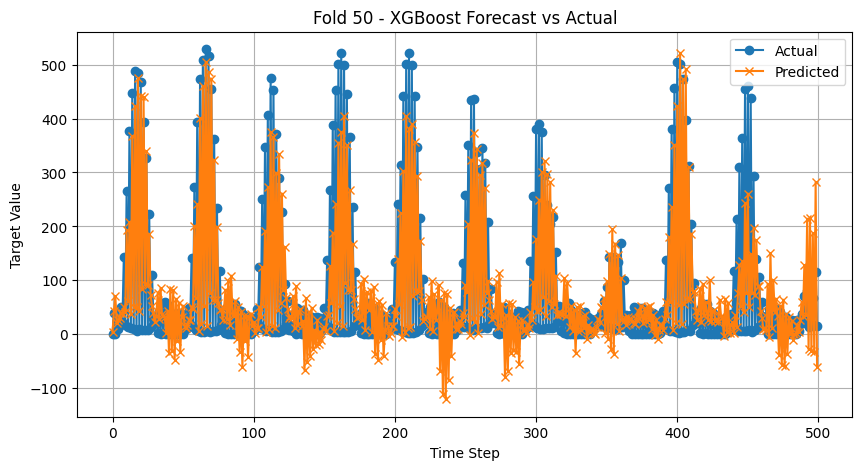

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title(f'Fold {fold + 1} - XGBoost Forecast vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()



In [19]:
import numpy as np

def MAE(y_test, preds):
    y_test, preds = np.array(y_test), np.array(preds)
    return np.mean(np.abs(y_test - preds))

def RMSE(y_test, preds):
    y_test, preds = np.array(y_test), np.array(preds)
    return np.sqrt(np.mean((y_test - preds)**2))

def MAPE(y_test, preds):
    y_test, preds = np.array(y_test), np.array(preds)
    # Avoid division by zero; add a tiny epsilon
    epsilon = 1e-10
    return np.mean(np.abs((y_test - preds) / (y_test + epsilon))) * 100

def sMAPE(y_test, preds):
    y_test, preds = np.array(y_test), np.array(preds)
    denominator = (np.abs(y_test) + np.abs(preds)) / 2
    # Avoid division by zero
    epsilon = 1e-10
    return np.mean(np.abs(y_test - preds) / (denominator + epsilon)) * 100

def MASE(y_test, preds):
    y_test, preds = np.array(y_test), np.array(preds)
    n = len(y_test)
    # Naive forecast (lag-1)
    naive_forecast = y_test[:-1]
    naive_actual = y_test[1:]
    mae_naive = np.mean(np.abs(naive_actual - naive_forecast))
    mae_model = np.mean(np.abs(y_test - preds))
    return mae_model / (mae_naive + 1e-10)  # avoid division by zero

def R2_score(y_test, preds):
    y_test, preds = np.array(y_test), np.array(preds)
    ss_res = np.sum((y_test - preds)**2)
    ss_tot = np.sum((y_test - np.mean(y_test))**2)
    return 1 - ss_res / (ss_tot + 1e-10)
#defining performance metrics

In [20]:


print("MAE:", MAE(y_test, y_pred))
print("RMSE:", RMSE(y_test, y_pred))
print("MAPE:", MAPE(y_test, y_pred))
print("sMAPE:", sMAPE(y_test, y_pred))
print("MASE:", MASE(y_test, y_pred))
print("R2:", R2_score(y_test, y_pred))


MAE: 42.7133951543169
RMSE: 60.441938398622824
MAPE: 2670.194058839629
sMAPE: 97.80159797428138
MASE: 0.2951163535508919
R2: 0.7961016673212526
